# 我不是药神，我是数据分析师OpenDataTools

近日，由徐峥主演的影片《我不是药神》在全国热议，获得影迷广泛好评。

我们都不是药神，但我们都可以救人。

我们都不是专家，但都可以用简单易用的OpenDataTools分析一下这部影片的票房走势。

## 第一步 数据准备

opendatatools的movie模块，提供对电影票房数据的查询。

In [3]:
# 导入movie模块
from opendatatools import movie

### API 介绍
get_recent_boxoffice ：获取最近7日的电影票房数据

In [48]:
# 获取近7天的票房数据
import pandas as pd
import datetime

df_list = []
for i in range(1,7):
    df, msg = movie.get_recent_boxoffice(i)
    df_list.append(df)

df_recent = pd.concat(df_list)

# 获取《我不是药神》这部影片的票房数据
df_recent = df_recent[df_recent.MovieName == '我不是药神']

# 选取需要处理的字段
df_data = df_recent[['AvgPrice', 'BoxOffice', 'SumBoxOffice', 'date']]
df_data['AvgPrice']     = df_data['AvgPrice'].apply(lambda x: int(x))
df_data['BoxOffice']    = df_data['BoxOffice'].apply(lambda x: int(x))
df_data['BoxOffice2']    = df_data['BoxOffice'].apply(lambda x: x / 10000)
df_data['SumBoxOffice'] = df_data['SumBoxOffice'].apply(lambda x: int(x))
df_data['SumBoxOffice2'] = df_data['SumBoxOffice'].apply(lambda x : x / 10000)

df_data['date']         = df_data['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

# 按照日期顺序排列
df_data.sort_values('date', ascending=True, inplace=True)

d:\QuantosTerminal\python\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\QuantosTerminal\python\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\QuantosTerminal\python\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

## 第二步 数据可视化

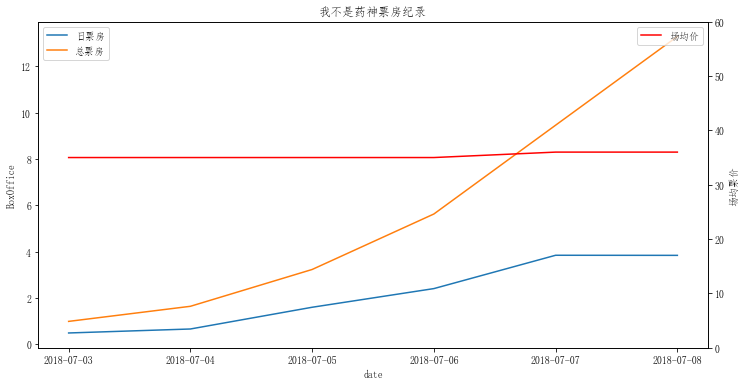

In [49]:
import matplotlib.pyplot as plt

from matplotlib.pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong'] 
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False 

fig = plt.figure(figsize=(12,6))

# 画柱状图
ax1 = fig.add_subplot(1,1,1)
ax1.plot(list(df_data['date']), list(df_data['BoxOffice2']), label='日票房')
ax1.plot(list(df_data['date']), list(df_data['SumBoxOffice2']), label='总票房')
ax1.legend(loc='upper left')
ax1.set_xlabel('date')
ax1.set_ylabel('BoxOffice')

# 画折线图
ax2 = ax1.twinx()
ax2.plot(list(df_data['date']), list(df_data['AvgPrice']), label='场均价', color='red')
ax2.legend(loc='upper right')
ax2.set_ylabel('场均票价')
ax2.set_ylim(0, 60)

# 标识标题及坐标轴信息
plt.title('我不是药神票房纪录')

# 显示画图结果
plt.show()



#### 点评 ####

1. 票房增长很快，上市短短几日，就揽入13亿多票房

2. 7月8日的票房已经比7月7日开始下降（两天刚好是周末），说明已接近增长高峰。

## 第三步 后续票房预测

### API 介绍

+ get_yearly_boxoffice  : 获取年度票房数据
+ get_monthly_boxoffice ：获取本月票房数据
+ get_boxoffice_rank    ：获取总票房排行榜

In [12]:
# 2018年电影市场格局
df, msg = movie.get_yearly_boxoffice(2018)
df.head(15)

,audience,avgprice,boxoffice,country,movie_name,movie_type,showtime
0,33,39,364774,中国香港/中国,1.红海行动,动作,2018-02-16
1,39,39,339666,中国,2.唐人街探案2,喜剧,2018-02-16
2,19,38,239035,美国,3.复仇者联盟3：无限战争,动作,2018-05-11
3,44,38,223666,中国香港/中国,4.捉妖记2,喜剧,2018-02-16
4,27,35,164544,中国,5.前任3：再见前任,喜剧,2017-12-29
5,20,36,163005,美国,6.侏罗纪世界2,动作,2018-06-15
6,18,36,139546,美国,7.头号玩家,科幻,2018-03-30
7,40,36,139114,中国,8.我不是药神,剧情,2018-07-05
8,21,34,136095,中国,9.后来的我们,爱情,2018-04-28
9,13,35,100324,美国,10.狂暴巨兽,动作,2018-04-13


In [11]:
# 今日最新票房信息
df, msg = movie.get_realtime_boxoffice()
df.head(10)

,BoxOffice,Irank,MovieImg,MovieName,boxPer,mId,movieDay,sumBoxOffice
0,7455.64,1,242167.jpg,我不是药神,83.81,676313,5,140378.53
1,474.59,2,240989.jpg,动物世界,5.34,660959,11,43165.15
2,400.72,3,256244.jpg,新大头儿子和小头爸爸3：俄罗斯奇遇记,4.50,672751,4,7397.29
3,291.79,4,225759.jpg,侏罗纪世界2,3.28,667168,25,163057.63
4,185.81,5,223686.jpg,超人总动员2,2.09,678021,18,31996.98
5,18.05,6,237446.jpg,金蝉脱壳2,0.20,678409,11,8888.44
6,17.61,7,235583.jpg,幸福马上来,0.20,652546,32,8751.26
7,12.45,8,10053.jpg,阿飞正传,0.14,1889,15,1750.67
8,9.55,9,234987.jpg,猛虫过江,0.11,653845,25,20049.51
9,6.27,10,217497.jpg,复仇者联盟3：无限战争,0.07,675789,60,239035.83


### 点评

2018年的高票房电影中，《我不是药神》已经排在了第8，按照目前的势头，超过20亿还是有很大机会。未来几天的走势至关重要。

## 第四步 这算不误正业吗？

其实还真不是，有些用户误解了。

电影票房数据与影视类上市公司的股票价格有着巨大的相关性。

以《我不是药神》为例，虽然只过去了几天，但其票房数据与相关股票股价却有着极强的相关性。

这部影片的制作方"北京文化"是一家上市公司，股票代码是000802.SZ。

###  API介绍

+ stock模块是opendatatools工具的股票模块，
+ get_daily可以获取股票的日线数据

In [51]:
# 获取北京文化股价
from opendatatools import stock
df_stock, msg = stock.get_daily('000802.SZ', start_date='2018-06-15', end_date='2018-07-09')
df_stock

,change,high,last,low,open,percent,symbol,time,turnover_rate,volume
0,-0.06,10.45,10.45,10.22,10.45,-0.57,000802.SZ,2018-06-15,0.56,3002700
1,-0.98,10.31,9.47,9.41,10.31,-9.38,000802.SZ,2018-06-19,1.70,6974340
2,-0.03,9.45,9.44,9.02,9.45,-0.32,000802.SZ,2018-06-20,0.85,3758893
3,-0.13,9.42,9.31,9.15,9.34,-1.38,000802.SZ,2018-06-21,0.60,2455814
4,0.20,9.55,9.51,9.18,9.22,2.15,000802.SZ,2018-06-22,0.81,3146615
5,0.17,9.94,9.68,9.53,9.53,1.79,000802.SZ,2018-06-25,0.69,2704998
6,0.23,9.92,9.91,9.50,9.54,2.38,000802.SZ,2018-06-26,0.69,2701543
7,0.33,10.27,10.24,9.85,9.90,3.33,000802.SZ,2018-06-27,1.06,4243090
8,0.12,10.50,10.36,10.15,10.20,1.17,000802.SZ,2018-06-28,1.50,5840102
9,0.08,10.50,10.44,10.31,10.45,0.77,000802.SZ,2018-06-29,1.21,4724675


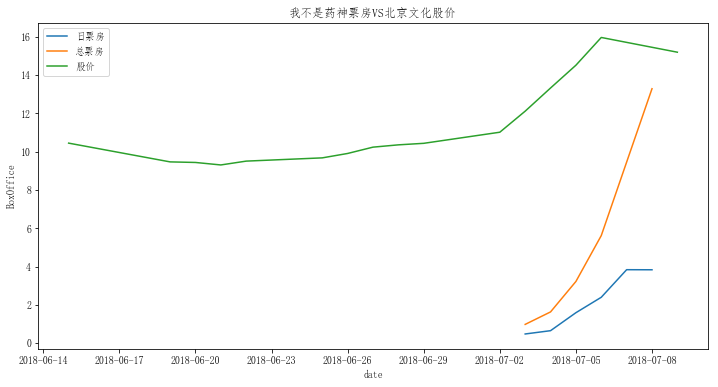

In [52]:
# 将票房数据和股价数据画在一起看看

import matplotlib.pyplot as plt

from matplotlib.pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong'] 
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False 

fig = plt.figure(figsize=(12,6))

# 画柱状图
ax1 = fig.add_subplot(1,1,1)
ax1.plot(list(df_data['date']), list(df_data['BoxOffice2']), label='日票房')
ax1.plot(list(df_data['date']), list(df_data['SumBoxOffice2']), label='总票房')
ax1.plot(list(df_stock['time']), list(df_stock['last']), label='股价')
ax1.legend(loc='upper left')
ax1.set_xlabel('date')
ax1.set_ylabel('BoxOffice')

# 标识标题及坐标轴信息
plt.title('我不是药神票房VS北京文化股价')

# 显示画图结果
plt.show()

## 第五步 我也来试试？

只需安装opendatatools，你就可以成为数据分析专家。

pip install opendatatools

看着wiki，很快你也可以是数据分析专家了。
